Variables or features explanations:
* age (Age in years)
* sex : (1 = male, 0 = female)
* cp (Chest Pain Type): [0: Typical Angina, 1: Atypical Angina, 2: Non-Anginal Pain, 3: Asymptomatic]
* trestbps (Resting Blood Pressure in mm/hg )
* chol (Serum Cholesterol in mg/dl)
* fps (Fasting Blood Sugar > 120 mg/dl): [0 = no, 1 = yes]
* restecg (Resting ECG): [0: normal, 1: having ST-T wave abnormality , 2: showing probable or definite left ventricular hypertrophy]
* thalach (maximum heart rate achieved)
* exang (Exercise Induced Angina): [1 = yes, 0 = no]
* oldpeak (ST depression induced by exercise relative to rest)
* slope (the slope of the peak exercise ST segment)
* ca [number of major vessels (0–3)]
* thal : [1 = normal, 2 = fixed defect, 3 = reversible defect]
* target: [0 = disease, 1 = no disease]

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

from sklearn import pipeline      # Pipeline
from sklearn import preprocessing # OrdinalEncoder, LabelEncoder
from sklearn import impute
from sklearn import compose
from sklearn import model_selection # train_test_split
from sklearn import metrics         # accuracy_score, balanced_accuracy_score, plot_confusion_matrix
from sklearn import set_config


In [2]:
df = pd.read_csv('./heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


(None,
               age         sex          cp    trestbps        chol         fbs  \
 count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
 mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
 std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
 min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
 25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
 50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
 75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
 max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   
 
           restecg     thalach       exang     oldpeak       slope          ca  \
 count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
 mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
 std   

In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

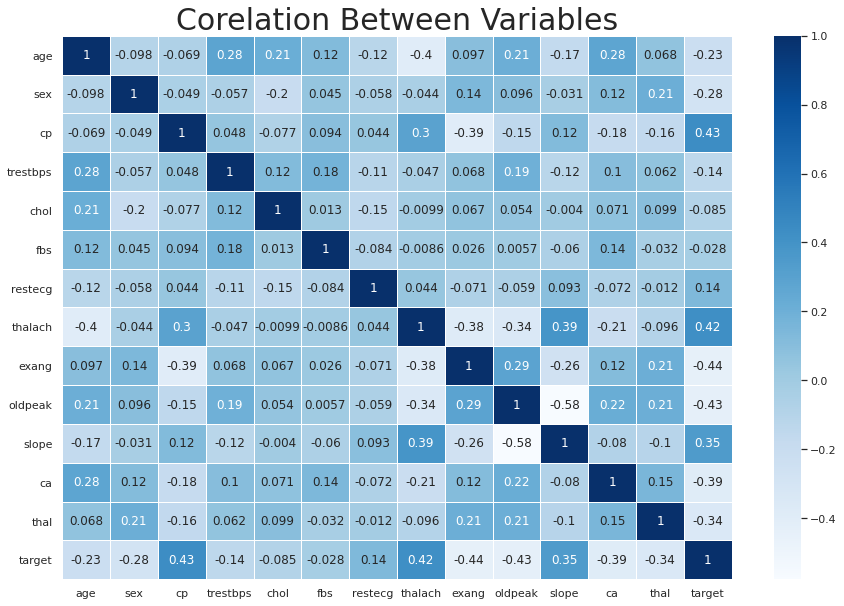

In [7]:
sns.set(style="white") 
plt.rcParams['figure.figsize'] = (15, 10) 
sns.heatmap(df.corr(), annot = True, linewidths=.5, cmap="Blues")
plt.title('Corelation Between Variables', fontsize = 30)
plt.show()

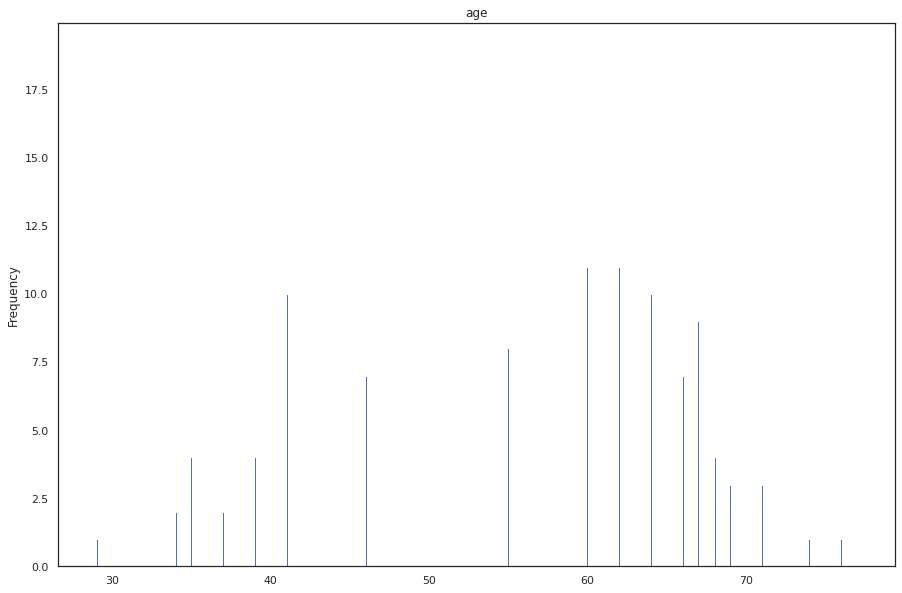

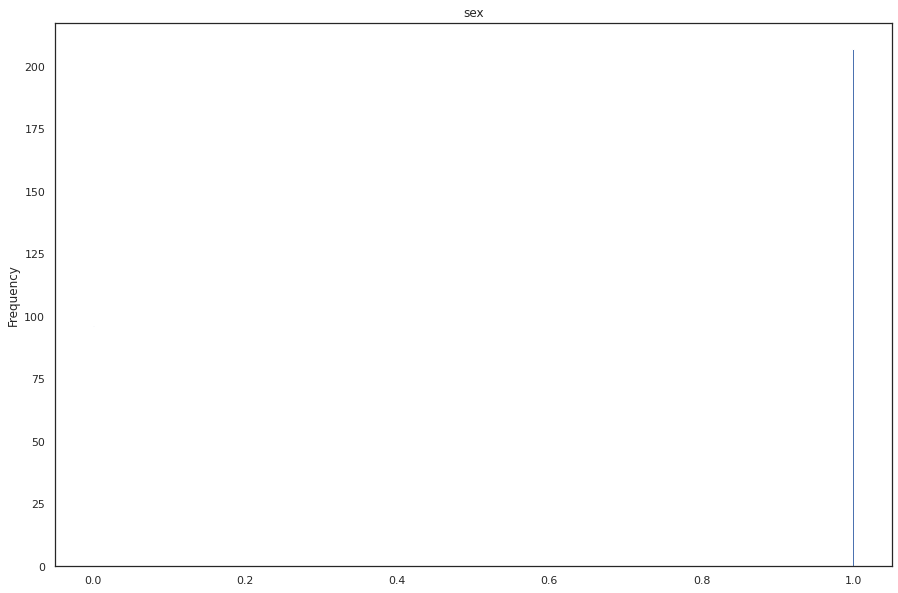

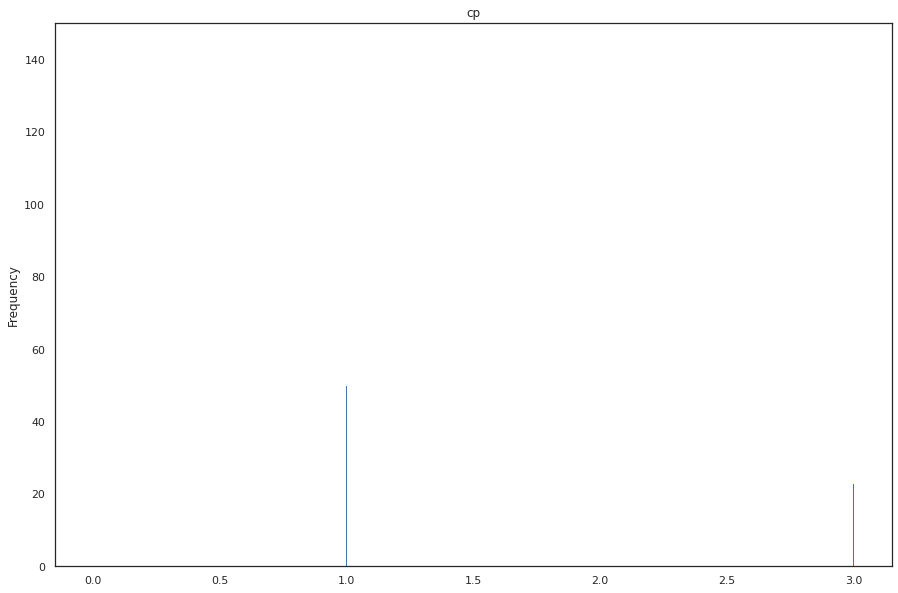

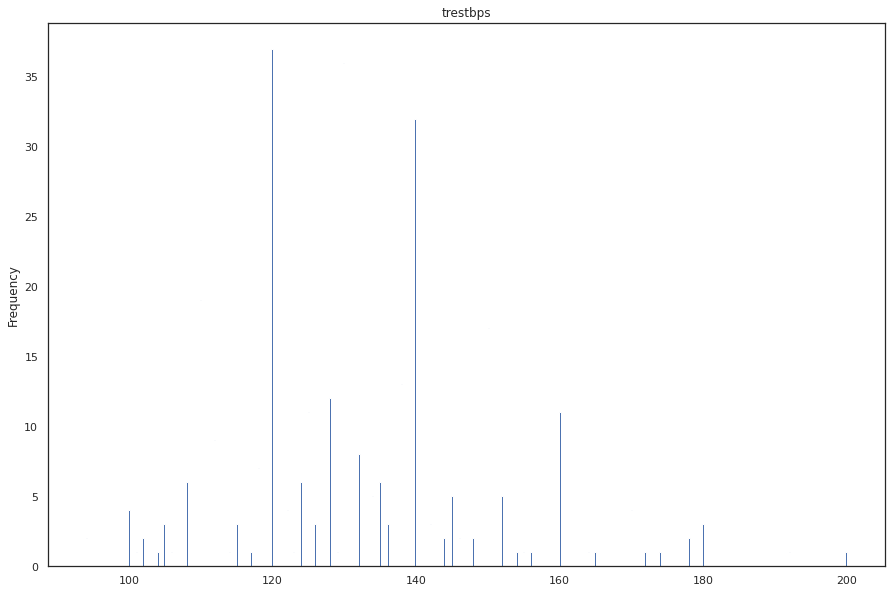

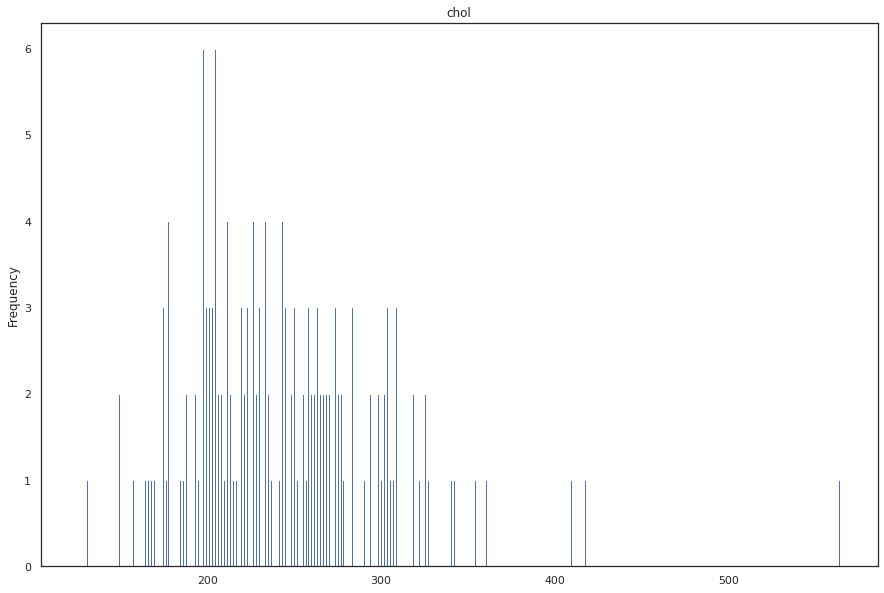

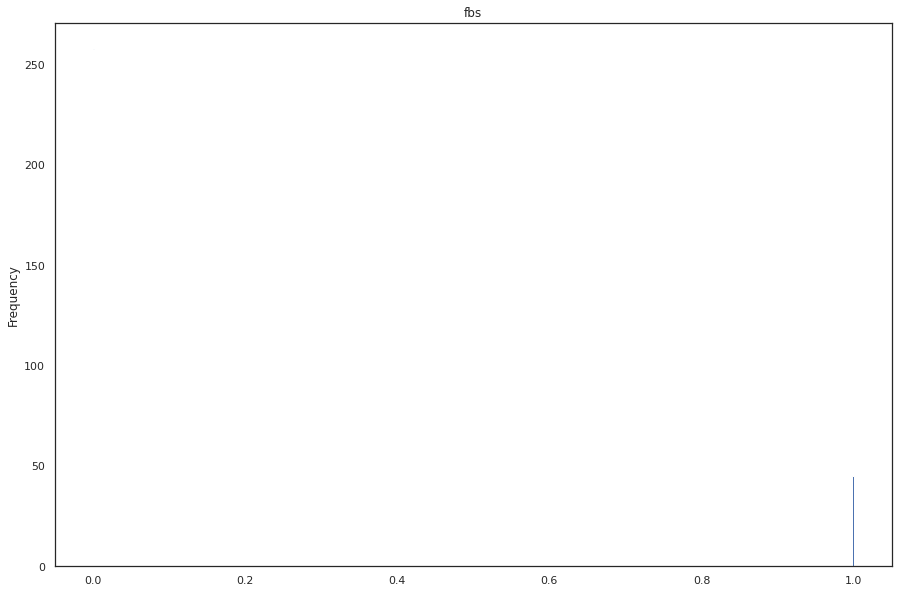

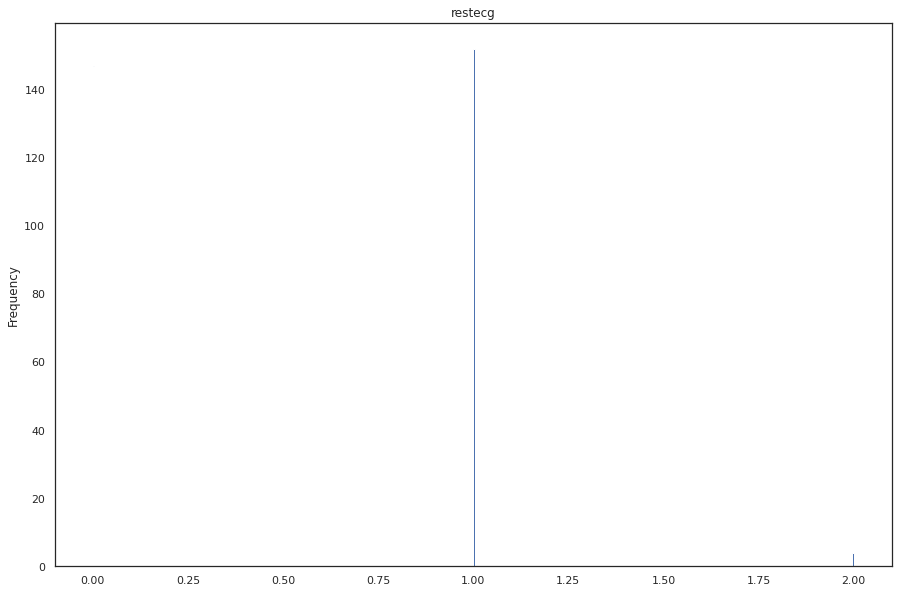

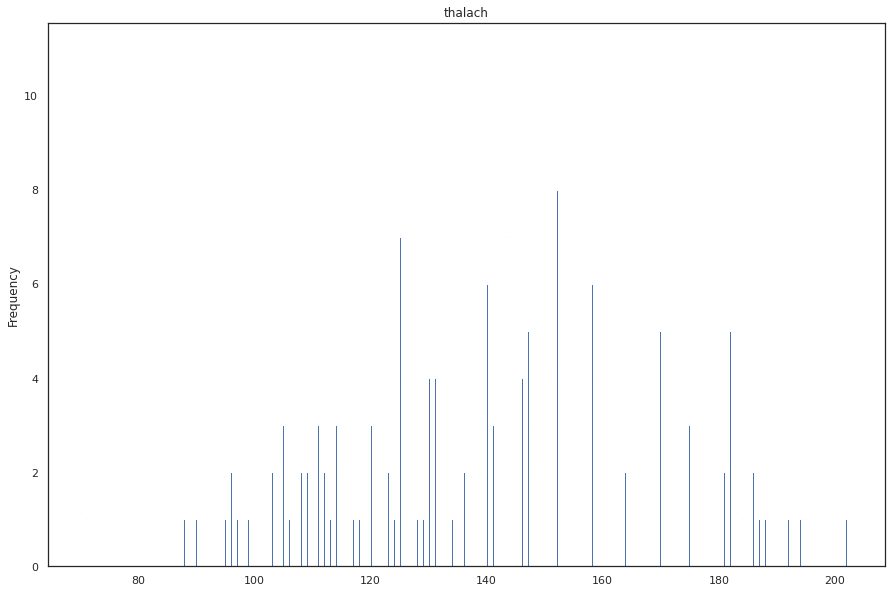

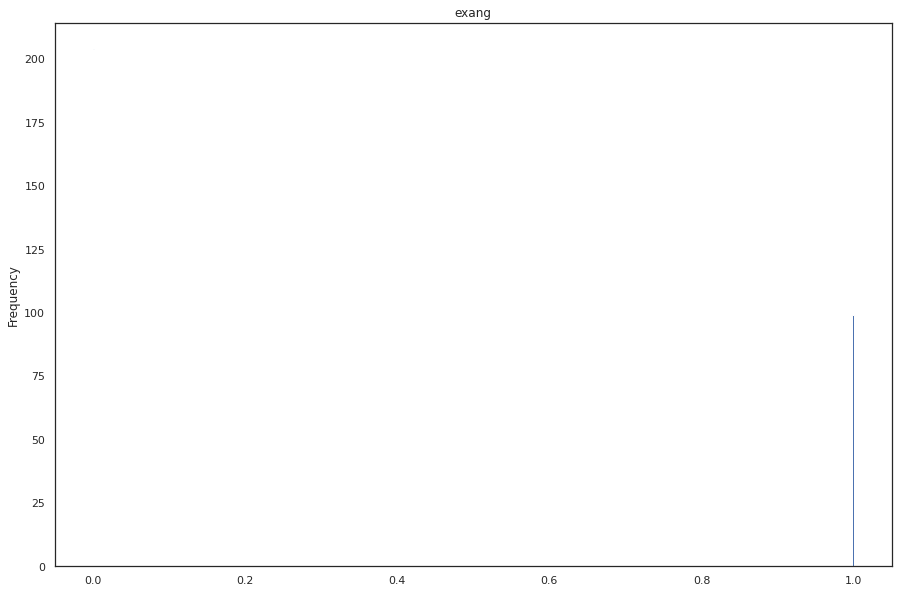

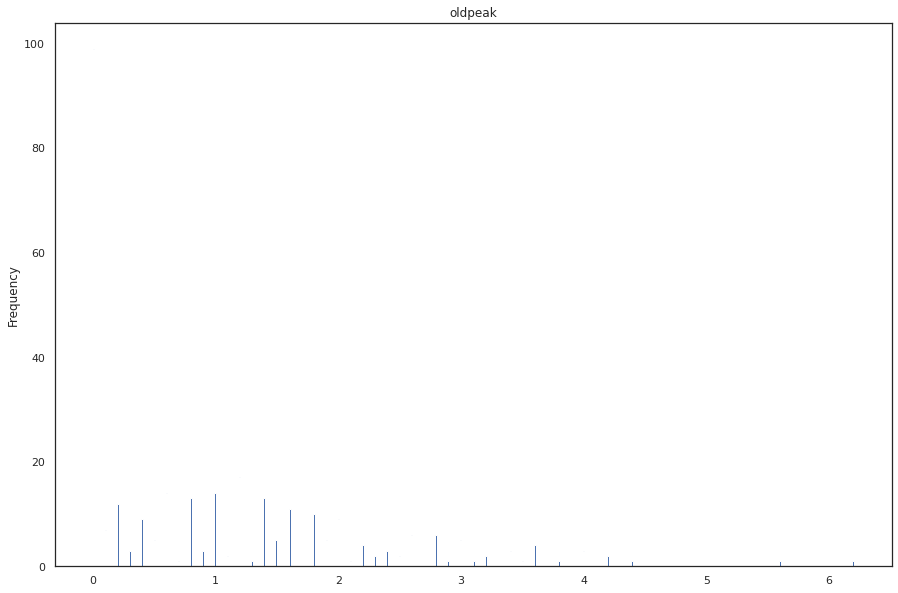

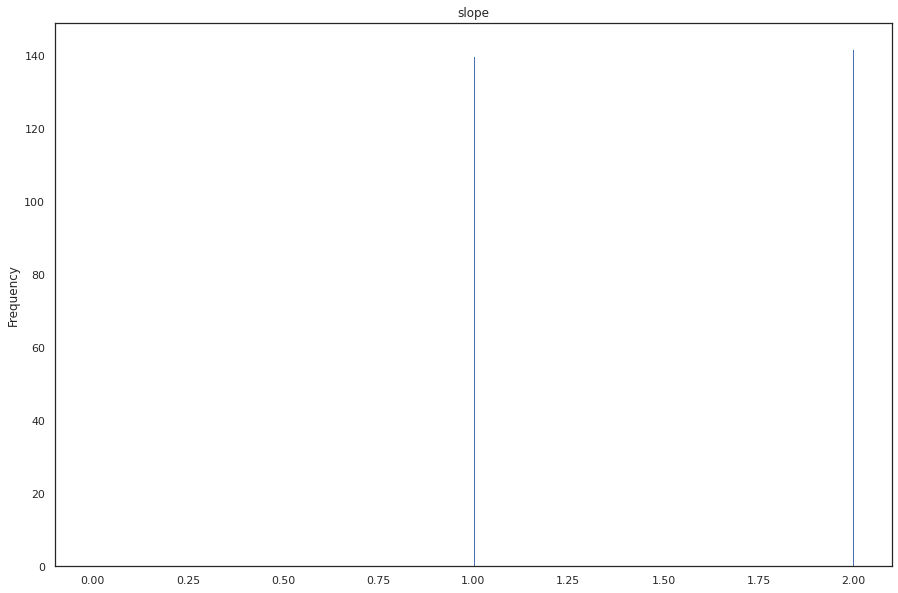

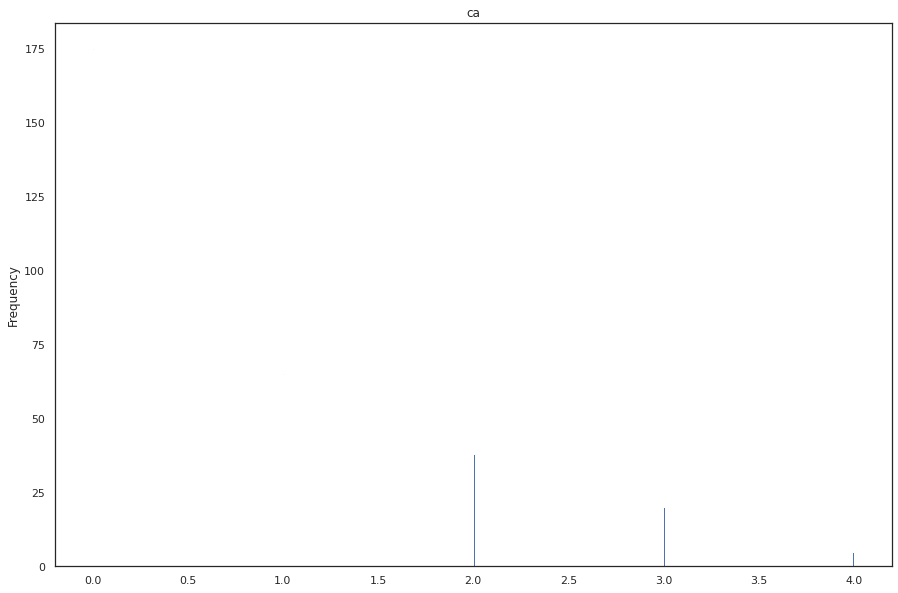

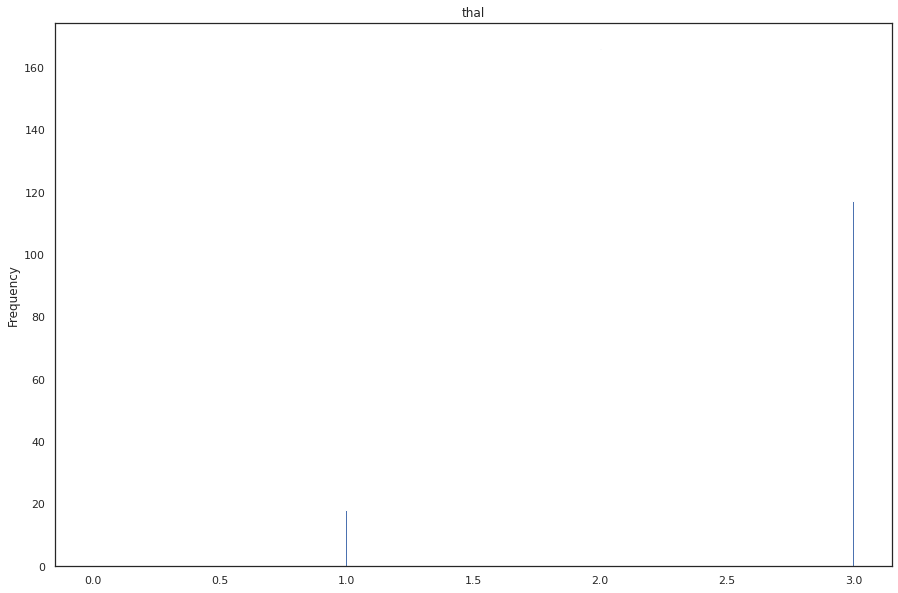

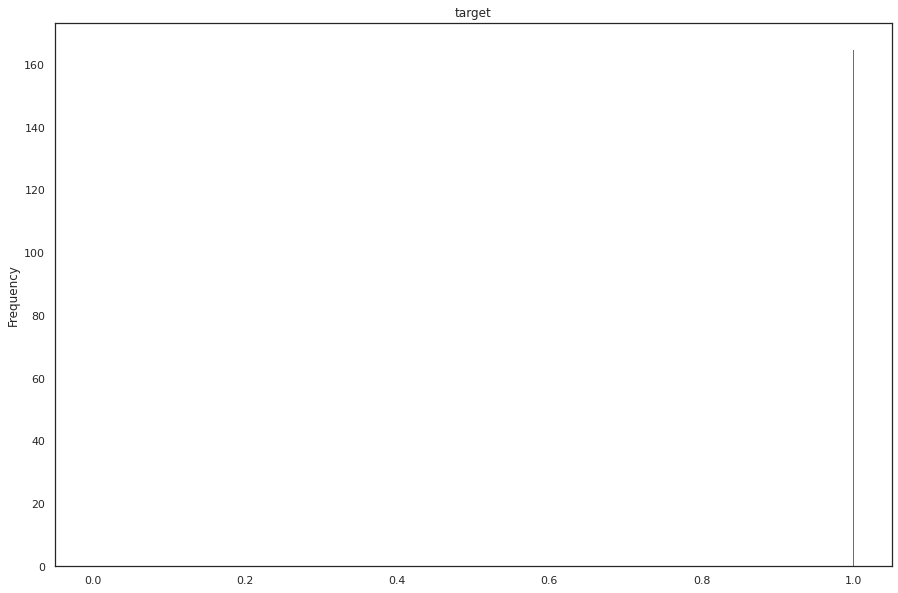

In [8]:
vars= df.columns
for var in vars:
    df[var].plot.hist(bins=500)
    plt.title(var)
    plt.show();

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df.loc[df['ca'] == 4, 'ca'] = np.NaN
df.loc[df['thal'] == 0, 'thal'] = np.NaN
# df = df.fillna(df.median())
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          5
thal        2
target      0
dtype: int64

In [11]:
print(df.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
ca          0.464357
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
thal        0.365264
slope       0.345877
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


1    165
0    138
Name: target, dtype: int64
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


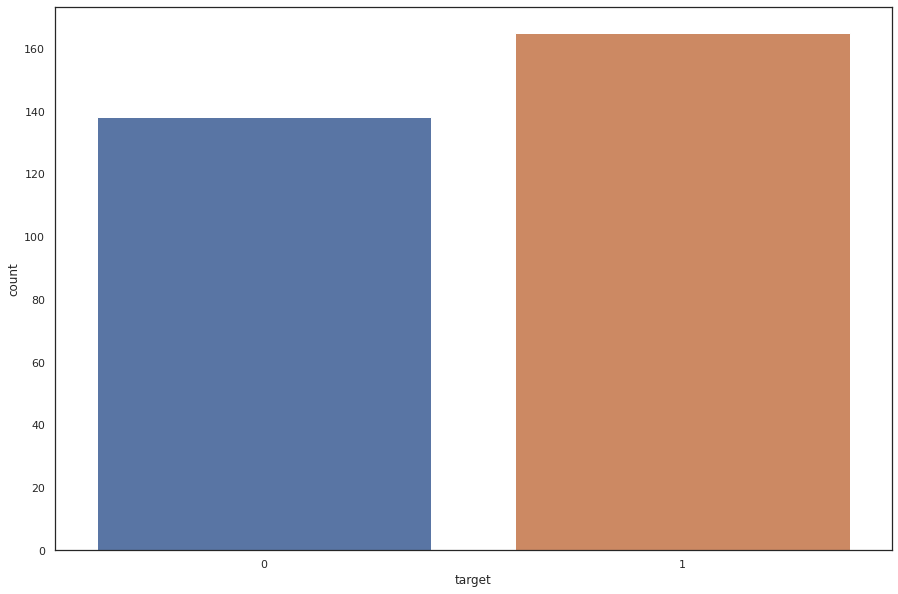

In [12]:
#target
y = df["target"]
sns.countplot(y)
target_temp = df.target.value_counts()

print(target_temp)

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='sex', ylabel='target'>

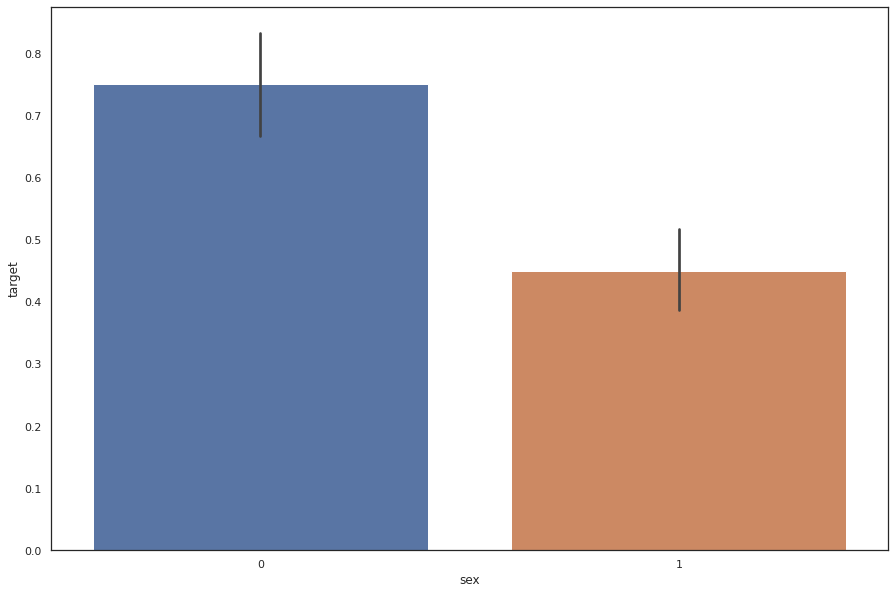

In [13]:
dataset= df
sns.barplot(dataset["sex"],y)

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='cp', ylabel='target'>

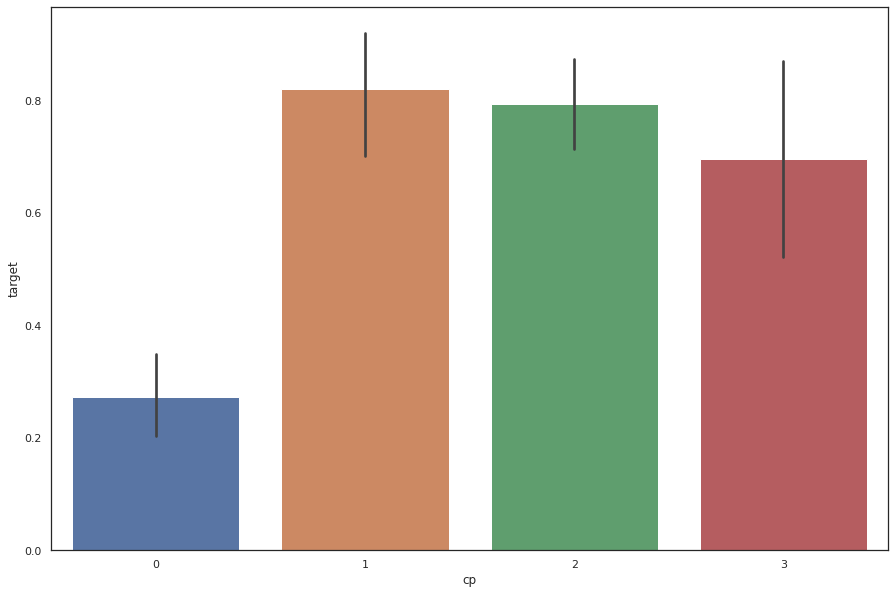

In [14]:
sns.barplot(dataset["cp"],y)

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='restecg', ylabel='target'>

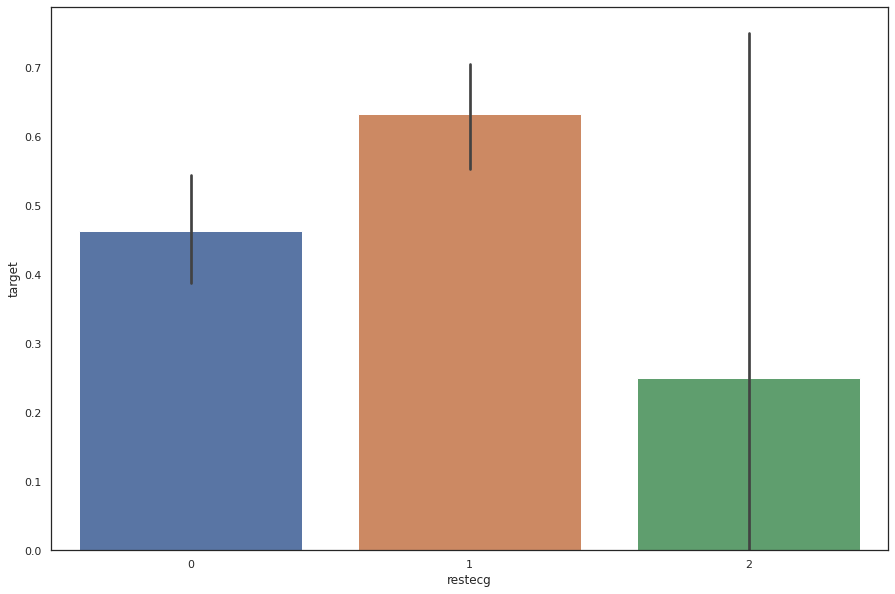

In [15]:
sns.barplot(dataset["restecg"],y)

We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='exang', ylabel='target'>

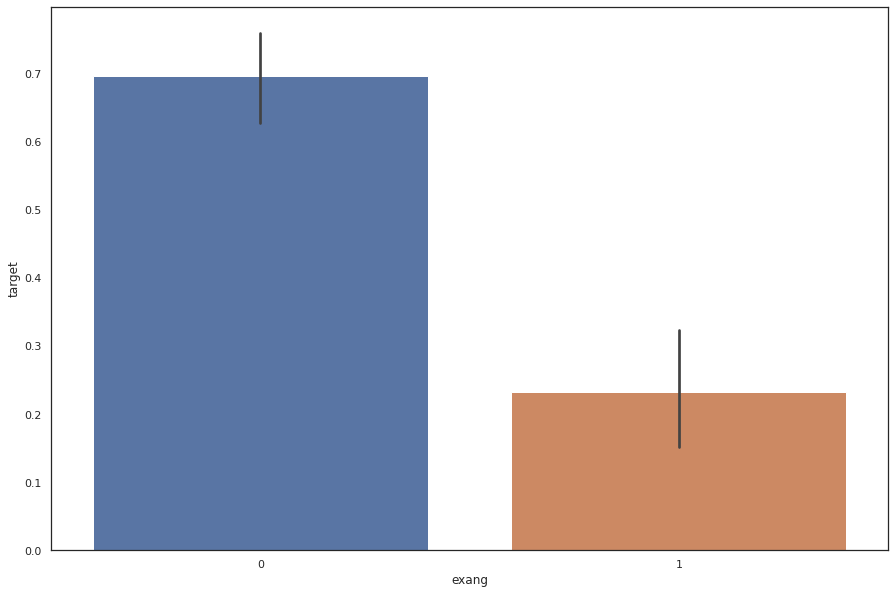

In [16]:
sns.barplot(dataset["exang"],y)

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='ca', ylabel='target'>

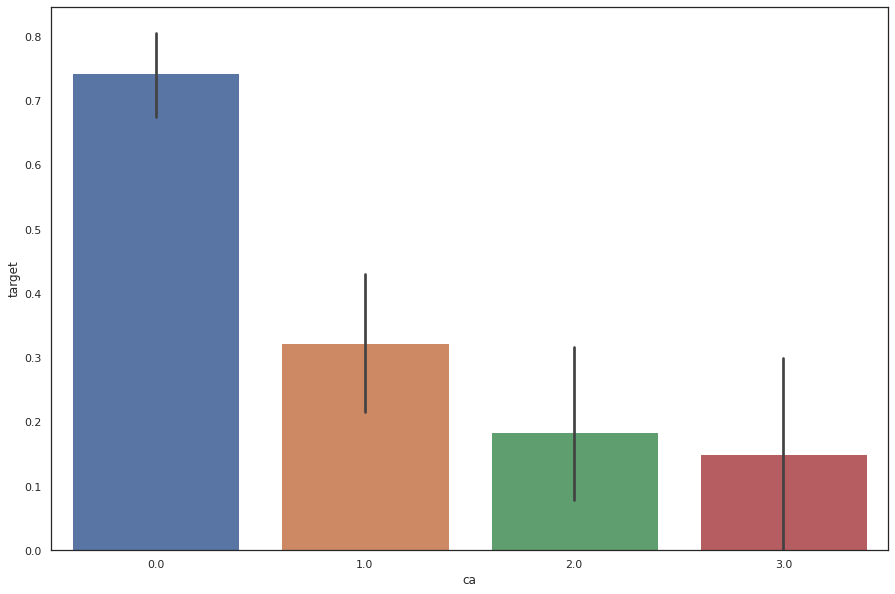

In [17]:
sns.barplot(dataset["ca"],y)

ca=4 has astonishingly large number of heart patients 

<AxesSubplot:>

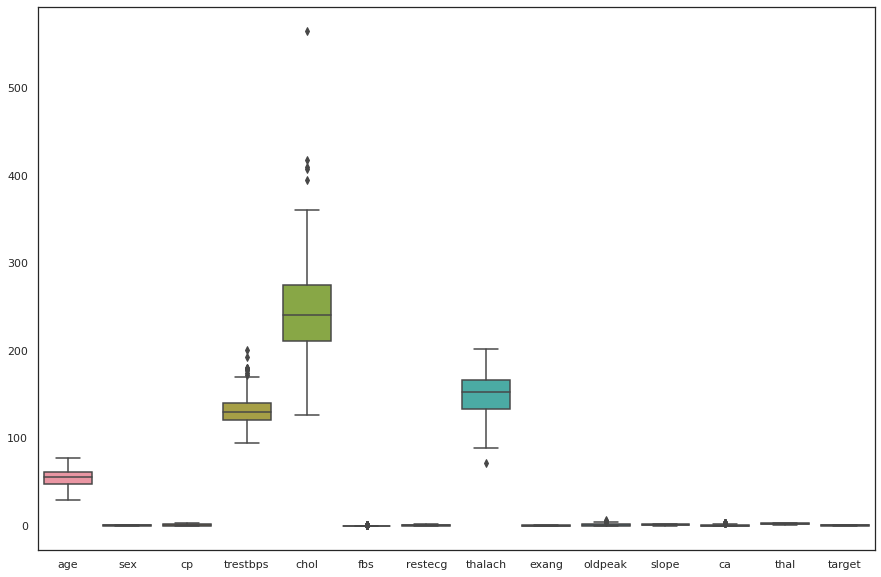

In [18]:
fig = plt.figure(figsize=(15,10))

sns.boxplot(data = df)

In [19]:
# define continuous variable & plot
continous_features = ['age','trestbps','chol','thalach','oldpeak']  
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            df.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))

outliers(df[continous_features])

For the feature age, No of Outliers is 0
For the feature trestbps, No of Outliers is 9
For the feature chol, No of Outliers is 5
For the feature thalach, No of Outliers is 1
For the feature oldpeak, No of Outliers is 5


In [20]:
outliers(df[continous_features], drop=True)

Outliers from age feature removed
Outliers from trestbps feature removed
Outliers from chol feature removed
Outliers from thalach feature removed
Outliers from oldpeak feature removed


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       284 non-null    int64  
 1   sex       284 non-null    int64  
 2   cp        284 non-null    int64  
 3   trestbps  284 non-null    int64  
 4   chol      284 non-null    int64  
 5   fbs       284 non-null    int64  
 6   restecg   284 non-null    int64  
 7   thalach   284 non-null    int64  
 8   exang     284 non-null    int64  
 9   oldpeak   284 non-null    float64
 10  slope     284 non-null    int64  
 11  ca        279 non-null    float64
 12  thal      282 non-null    float64
 13  target    284 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [22]:
added = np.random.randint(df['age'].min(), df['age'].max(), size=df.shape[0] // 2)
added


array([30, 54, 63, 53, 40, 42, 72, 30, 48, 74, 44, 52, 49, 41, 59, 50, 54,
       59, 61, 53, 48, 74, 67, 65, 39, 34, 38, 42, 69, 45, 30, 42, 35, 48,
       43, 58, 57, 34, 54, 46, 69, 36, 30, 53, 29, 76, 67, 70, 68, 37, 48,
       43, 29, 49, 35, 46, 76, 33, 73, 30, 52, 33, 34, 51, 33, 73, 54, 54,
       76, 62, 65, 36, 30, 31, 30, 61, 44, 54, 64, 65, 55, 43, 65, 59, 42,
       59, 36, 68, 68, 53, 69, 52, 67, 74, 34, 60, 72, 44, 60, 35, 70, 36,
       62, 76, 41, 58, 67, 73, 34, 60, 42, 34, 38, 55, 54, 66, 34, 29, 29,
       56, 69, 66, 73, 61, 48, 71, 61, 65, 75, 70, 49, 42, 39, 43, 61, 53,
       33, 73, 34, 37, 37, 32])

In [23]:
added = np.array([])
for col in df.columns:
    added = np.append(added, np.random.randint(df[col].min(), df[col].max(), size=df.shape[0] // 2))

In [24]:
added

array([74., 41., 66., ...,  0.,  0.,  0.])

In [25]:
added = added.reshape(df.shape[1], df.shape[0] // 2).transpose()

In [26]:
added.shape

(142, 14)

In [27]:
df_added = pd.DataFrame(added, columns=df.columns)
df_added

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,74.0,0.0,0.0,158.0,323.0,0.0,1.0,131.0,0.0,2.0,0.0,2.0,1.0,0.0
1,41.0,0.0,2.0,147.0,245.0,0.0,0.0,177.0,0.0,1.0,0.0,2.0,2.0,0.0
2,66.0,0.0,0.0,150.0,310.0,0.0,1.0,196.0,0.0,3.0,1.0,1.0,2.0,0.0
3,72.0,0.0,1.0,157.0,356.0,0.0,0.0,114.0,0.0,2.0,1.0,0.0,2.0,0.0
4,72.0,0.0,0.0,162.0,205.0,0.0,1.0,90.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,40.0,0.0,2.0,162.0,175.0,0.0,0.0,104.0,0.0,1.0,0.0,1.0,2.0,0.0
138,70.0,0.0,1.0,157.0,279.0,0.0,1.0,166.0,0.0,1.0,0.0,0.0,2.0,0.0
139,67.0,0.0,2.0,136.0,310.0,0.0,1.0,162.0,0.0,3.0,1.0,0.0,1.0,0.0
140,36.0,0.0,0.0,163.0,328.0,0.0,0.0,114.0,0.0,0.0,0.0,0.0,1.0,0.0


In [28]:
dfs = [df, df_added]

df_final = pd.concat(dfs, ignore_index=True)

In [29]:
df_final

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,40.0,0.0,2.0,162.0,175.0,0.0,0.0,104.0,0.0,1.0,0.0,1.0,2.0,0.0
422,70.0,0.0,1.0,157.0,279.0,0.0,1.0,166.0,0.0,1.0,0.0,0.0,2.0,0.0
423,67.0,0.0,2.0,136.0,310.0,0.0,1.0,162.0,0.0,3.0,1.0,0.0,1.0,0.0
424,36.0,0.0,0.0,163.0,328.0,0.0,0.0,114.0,0.0,0.0,0.0,0.0,1.0,0.0


In [30]:
df_final.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,421.000000,424.000000,426.000000
mean,53.117371,0.467136,0.997653,130.248826,240.232394,0.093897,0.511737,147.760563,0.211268,1.146479,1.129108,0.757720,2.030660,0.373239
std,10.998624,0.499505,0.954245,17.362409,54.254607,0.292028,0.509767,26.793396,0.408688,1.091787,0.709431,0.893478,0.681747,0.484234
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,44.000000,0.000000,0.000000,119.250000,203.250000,0.000000,0.000000,130.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,0.000000,1.000000,130.000000,239.000000,0.000000,1.000000,151.000000,0.000000,1.000000,1.000000,0.000000,2.000000,0.000000
75%,61.000000,1.000000,2.000000,140.000000,278.000000,0.000000,1.000000,168.750000,0.000000,2.000000,2.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,170.000000,360.000000,1.000000,2.000000,202.000000,1.000000,4.000000,2.000000,3.000000,3.000000,1.000000


In [31]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,279.000000,282.000000,284.000000
mean,53.992958,0.700704,0.989437,129.911972,242.077465,0.140845,0.524648,150.042254,0.316901,0.948592,1.429577,0.648746,2.312057,0.559859
std,9.161678,0.458758,1.031258,15.368133,44.753834,0.348476,0.514206,22.692716,0.466090,1.026141,0.599150,0.908745,0.580033,0.497280
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,46.750000,0.000000,0.000000,120.000000,209.750000,0.000000,0.000000,133.750000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,1.000000,153.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,270.250000,0.000000,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,170.000000,360.000000,1.000000,2.000000,202.000000,1.000000,4.000000,2.000000,3.000000,3.000000,1.000000


In [32]:
same_range = []
for col in df:
    same_range.append((df[col].max() == df_final[col].max(), df[col].min() == df_final[col].min()))

same_range

[(True, True),
 (True, True),
 (True, True),
 (True, True),
 (True, True),
 (True, True),
 (True, True),
 (True, True),
 (True, True),
 (True, True),
 (True, True),
 (True, True),
 (True, True),
 (True, True)]

In [33]:
#Binary: sex, fbs, exang, target
#Categorical: cp, restecg, slope, ca, thal
#Continuous: age, trestbps, chol, thalac, oldpeak
#
#var= ['sex','fbs','cp','restecg', 'exang', 'slope', 'ca', 'thal', 'age','trestbps', 'chol','thalach','oldpeak']
from sklearn.model_selection import train_test_split
import category_encoders as ce
import time

cat_vars = ['sex','fbs','cp','restecg', 'exang', 'slope', 'ca', 'thal']
num_vars = ['age','trestbps', 'chol','thalach','oldpeak']
var= cat_vars + num_vars
x = df_final[var]
y = df_final['target']

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.20,random_state=0)

In [34]:
# Tree models preprocessing

set_config(display='diagram')
# num_preprocessing = pipeline.Pipeline(steps=[
#     ('scaler', preprocessing.StandardScaler())    
# ])

cat_4_treeModels = pipeline.Pipeline(steps=[
    ('target', ce.TargetEncoder(cols = cat_vars))
    # ('ordinal', preprocessing.OrdinalEncoder(categories='auto', handle_unknown='use_encoded_value', unknown_value=-9999))
])

tree_prepro = compose.ColumnTransformer(transformers=[
    # ('num', num_preprocessing, num_vars),
    ('cat', cat_4_treeModels, cat_vars),
], remainder='drop') # Drop other vars not specified in num_vars or cat_vars


tree_prepro

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('target',
                                                  TargetEncoder(cols=['sex',
                                                                      'fbs',
                                                                      'cp',
                                                                      'restecg',
                                                                      'exang',
                                                                      'slope',
                                                                      'ca',
                                                                      'thal']))]),
                                 ['sex', 'fbs', 'cp', 'restecg', 'exang',
                                  'slope', 'ca', 'thal'])])

In [35]:
# Multiplicative model preprocessing

num_4_multModels = pipeline.Pipeline(steps=[
    ('quant', preprocessing.QuantileTransformer(output_distribution='normal', random_state=73)),
    ('norm', preprocessing.Normalizer()),
])


cat_4_multModels = pipeline.Pipeline(steps=[
    ('onehot', preprocessing.OneHotEncoder(categories='auto', handle_unknown='ignore'))
])

mult_prepro = compose.ColumnTransformer(transformers=[
    ('num_m', num_4_multModels, num_vars),
    ('cat_m', cat_4_multModels, cat_vars),
], remainder='drop')

In [44]:
from sklearn.tree          import DecisionTreeClassifier
from sklearn.ensemble      import RandomForestClassifier
from sklearn.ensemble      import ExtraTreesClassifier
from sklearn.ensemble      import AdaBoostClassifier
from sklearn.ensemble      import GradientBoostingClassifier
from sklearn.experimental  import enable_hist_gradient_boosting # Necesary for HistGradientBoostingClassifier
from sklearn.ensemble      import HistGradientBoostingClassifier
from xgboost               import XGBClassifier
from lightgbm              import LGBMClassifier
from catboost              import CatBoostClassifier

tree_classifiers = {
  "Decision Tree": DecisionTreeClassifier(),
  "Extra Trees": ExtraTreesClassifier(),
  "Random Forest": RandomForestClassifier(),
  "AdaBoost": AdaBoostClassifier(), 
  "Skl GBM": GradientBoostingClassifier(),
  "Skl HistGBM": HistGradientBoostingClassifier(), 
  "XGBoost": XGBClassifier(),
  "LightGBM": LGBMClassifier(),
  "CatBoost": CatBoostClassifier() }

tree_pipelines = {name: pipeline.make_pipeline(tree_prepro, model) for name, model in tree_classifiers.items()}
tree_pipelines

{'Decision Tree': Pipeline(steps=[('columntransformer',
                  ColumnTransformer(transformers=[('cat',
                                                   Pipeline(steps=[('target',
                                                                    TargetEncoder(cols=['sex',
                                                                                        'fbs',
                                                                                        'cp',
                                                                                        'restecg',
                                                                                        'exang',
                                                                                        'slope',
                                                                                        'ca',
                                                                                        'thal']))]),
                                    

In [37]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

mult_classifiers = {
  "SVC": SVC(random_state=0),
  "Logistic": LogisticRegression(random_state=0),
  "Neural": MLPClassifier(),
  "KNN": KNeighborsClassifier(n_neighbors=10),
}

mult_pipelines = {name: pipeline.make_pipeline(mult_prepro, model) for name, model in mult_classifiers.items()}

In [38]:
tree_classifiers = {name: pipeline.make_pipeline(tree_prepro, model) for name, model in tree_classifiers.items()}

mult_classifiers = {name: pipeline.make_pipeline(mult_prepro, model) for name, model in mult_classifiers.items()}

all_pipelines = {**tree_classifiers, **mult_classifiers}

In [39]:
results = pd.DataFrame({'Model': [], 'Accuracy': [], 'Bal Acc.': [], 'Time': []})
for model_name, model in all_pipelines.items():
    start_time = time.time()

    model.fit(x_train, y_train)

    pred = model.predict(x_val)

    total_time = time.time() - start_time

    results = results.append({"Model":    model_name,
                              "Accuracy": metrics.accuracy_score(y_val, pred)*100,
                              "Bal Acc.": metrics.balanced_accuracy_score(y_val, pred)*100,
                              "Time":     total_time},
                              ignore_index=True)




results_ord = results.sort_values(by=['Accuracy'], ascending=False, ignore_index=True)
results_ord.index += 1 
results_ord.style.bar(subset=['Accuracy', 'Bal Acc.'], vmin=0, vmax=100, color='#5fba7d')

11:	learn: 0.6288763	total: 53.5ms	remaining: 4.4s
12:	learn: 0.6253751	total: 54ms	remaining: 4.1s
13:	learn: 0.6214764	total: 54.4ms	remaining: 3.83s
14:	learn: 0.6158260	total: 54.9ms	remaining: 3.61s
15:	learn: 0.6130172	total: 55.4ms	remaining: 3.4s
16:	learn: 0.6073383	total: 55.9ms	remaining: 3.23s
17:	learn: 0.6053292	total: 56.3ms	remaining: 3.07s
18:	learn: 0.6006754	total: 56.8ms	remaining: 2.93s
19:	learn: 0.5959692	total: 57.3ms	remaining: 2.81s
20:	learn: 0.5932242	total: 57.7ms	remaining: 2.69s
21:	learn: 0.5890135	total: 58.2ms	remaining: 2.59s
22:	learn: 0.5850533	total: 58.8ms	remaining: 2.5s
23:	learn: 0.5799886	total: 59.3ms	remaining: 2.41s
24:	learn: 0.5750900	total: 59.8ms	remaining: 2.33s
25:	learn: 0.5708988	total: 60.3ms	remaining: 2.26s
26:	learn: 0.5663553	total: 60.9ms	remaining: 2.19s
27:	learn: 0.5616776	total: 61.4ms	remaining: 2.13s
28:	learn: 0.5579019	total: 61.9ms	remaining: 2.07s
29:	learn: 0.5536905	total: 62.4ms	remaining: 2.02s
30:	learn: 0.55094

,Model,Accuracy,Bal Acc.,Time
1,CatBoost,86.046512,85.666667,0.833291
2,Neural,86.046512,85.666667,0.928832
3,KNN,86.046512,84.888889,0.046912
4,Skl HistGBM,84.883721,84.666667,0.277562
5,SVC,84.883721,84.277778,0.029323
6,Skl GBM,83.720930,83.277778,0.185088
7,Logistic,83.720930,83.277778,0.039882
8,Random Forest,82.558140,81.888889,0.242952
9,XGBoost,82.558140,82.277778,0.215463
10,LightGBM,82.558140,82.277778,0.142344


In [40]:
tree_best = {
# "Decision Tree": DecisionTreeClassifier(),
  # "Extra Trees": ExtraTreesClassifier(),
#   "Random Forest": RandomForestClassifier(),
#   "AdaBoost": AdaBoostClassifier(), 
  # "Skl GBM": GradientBoostingClassifier(),
  "Skl HistGBM": HistGradientBoostingClassifier(), 
#   "XGBoost": XGBClassifier(),
#   "LightGBM": LGBMClassifier(),
  "CatBoost": CatBoostClassifier() 
}

mult_best = {
  "SVC": SVC(random_state=0),
  # "Logistic": LogisticRegression(random_state=0),
  "Neural": MLPClassifier(),
  "KNN": KNeighborsClassifier(n_neighbors=10),
}

tree_best = {name: pipeline.make_pipeline(tree_prepro, model) for name, model in tree_best.items()}

mult_best = {name: pipeline.make_pipeline(mult_prepro, model) for name, model in mult_best.items()}

best_pipelines = {**tree_best, **mult_best}

In [41]:
# Applying KFold
from sklearn.model_selection import cross_val_predict
skf = model_selection.StratifiedKFold(
    n_splits=10,
    shuffle=True,
    random_state=73
)

results_best = pd.DataFrame({'Model': [], 'Accuracy': [], 'Bal Acc.': [], 'Time': []})

for name, pipe in best_pipelines.items():

    start_time = time.time()
    preds = 0
    # YOUR CODE HERE

    preds = cross_val_predict(pipe, x, y, cv=skf, n_jobs=-1)

    total_time = time.time() - start_time
    

    
    results_best = results_best.append({"Model": name,
                              "Accuracy": metrics.accuracy_score(y, preds) * 100,
                              "Bal Acc.": metrics.balanced_accuracy_score(y, preds) * 100,
                              "Time":     total_time},
                              ignore_index=True)
    
    
results_ord_best = results_best.sort_values(by=['Accuracy'], ascending=False, ignore_index=True)
results_ord_best.index += 1 
results_ord_best.style.bar(subset=['Accuracy', 'Bal Acc.'], vmin=0, vmax=100, color='#5fba7d')

,Model,Accuracy,Bal Acc.,Time
1,SVC,88.262911,86.947919,0.391694
2,Neural,85.915493,84.820861,4.255225
3,KNN,85.211268,82.732669,0.341563
4,CatBoost,84.741784,83.884531,8.561592
5,Skl HistGBM,84.507042,83.442866,5.321317


In [74]:
# defining the final model

num_4_final = pipeline.Pipeline(steps=[
    ('quant', preprocessing.QuantileTransformer(output_distribution='normal', random_state=73)),
    ('norm', preprocessing.Normalizer()),
])


cat_4_final = pipeline.Pipeline(steps=[
    ('onehot', preprocessing.OneHotEncoder(categories='auto', handle_unknown='ignore'))
])

final_prepro = compose.ColumnTransformer(transformers=[
    ('num_m', num_4_multModels, num_vars),
    ('cat_m', cat_4_multModels, cat_vars),
], remainder='drop')

final_model = {
    "SVC": SVC(random_state=0),
}
final_model
final_model = {name: pipeline.make_pipeline(final_prepo, model) for name, model in final_model.items()}

final_model

NameError: name 'final_prepo' is not defined

### Feature eng

In [71]:
import pandas as pd
from sklearn.datasets import make_classification
from feature_engine.selection import SmartCorrelatedSelection

# set up the selector
tr = SmartCorrelatedSelection()
dm = df.dropna()
Xt = tr.fit_transform(x.dropna())

tr.correlated_feature_sets_


[]

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cf30d20f-b1ff-421b-be28-e95a2723dc4f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>